## 3-1 統計解析の種類

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

In [2]:
from sklearn import linear_model

In [3]:
pwd

'c:\\Users\\kaidu\\Desktop\\Programing\\DS_Training_course_at_the_UTokyo\\MyCodes\\chap3'

In [4]:
import requests, zipfile
from io import StringIO
import io

In [6]:
# urlの指定
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [8]:
student_data_math = pd.read_csv('student-mat.csv')

In [9]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [12]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [16]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [18]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

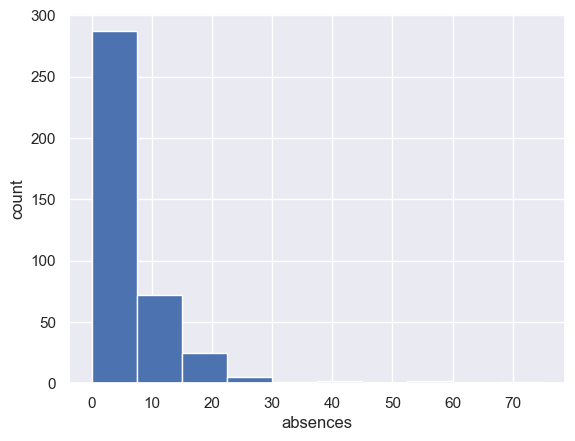

In [25]:
# ヒストグラム
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [29]:
print("平均値：{}".format(student_data_math['absences'].mean()))
print("中央値：{}".format(student_data_math['absences'].median()))
print("最頻値：{}".format(student_data_math['absences'].mode()))

平均値：5.708860759493671
中央値：4.0
最頻値：0    0
Name: absences, dtype: int64


In [31]:
student_data_math['absences'].var(ddof=0)

63.887

In [33]:
student_data_math['absences'].std(ddof=0)

7.993

In [35]:
np.sqrt(student_data_math['absences'].var(ddof=0))

7.993

In [39]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [40]:
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

C:\Temp\ipykernel_3184\1570060386.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]
C:\Temp\ipykernel_3184\1570060386.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]


8.000

In [42]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


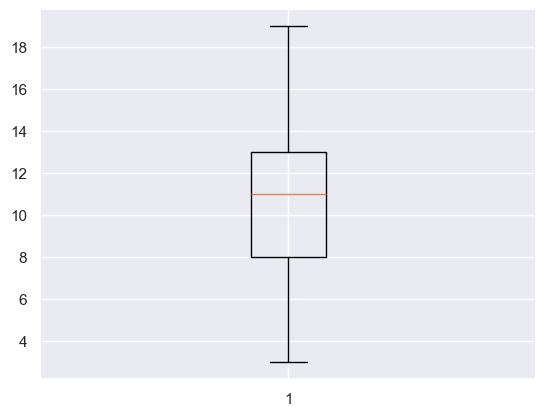

In [44]:
# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

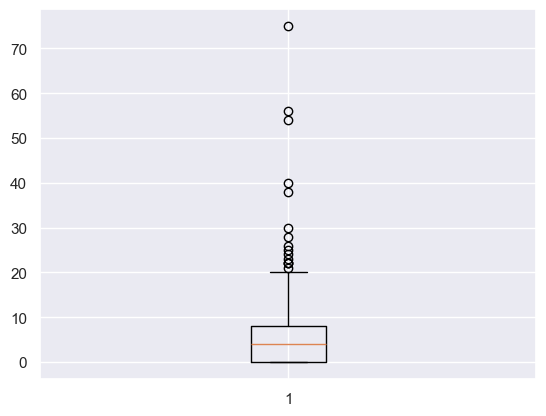

In [45]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

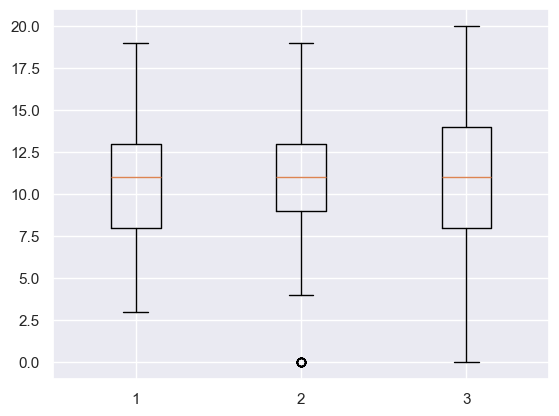

In [46]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [49]:
# 変動係数：欠席数
student_data_math['absences'].std(ddof=0) / student_data_math['absences'].mean()

1.400

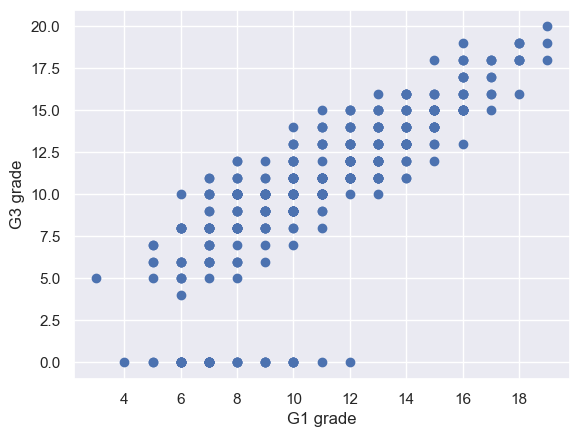

In [50]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [52]:
# 共分散行列
np.cov(student_data_math['G1'], student_data_math['G3'], ddof=0)

array([[10.989, 12.157],
       [12.157, 20.936]])

In [54]:
print("G1の共分散:{}".format(student_data_math['G1'].var(ddof=0)))
print("G3の共分散:{}".format(student_data_math['G3'].var(ddof=0)))

G1の共分散:10.989161993270308
G3の共分散:20.936478128505044


In [56]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

PearsonRResult(statistic=np.float64(0.8014679320174142), pvalue=np.float64(9.001430312276616e-90))

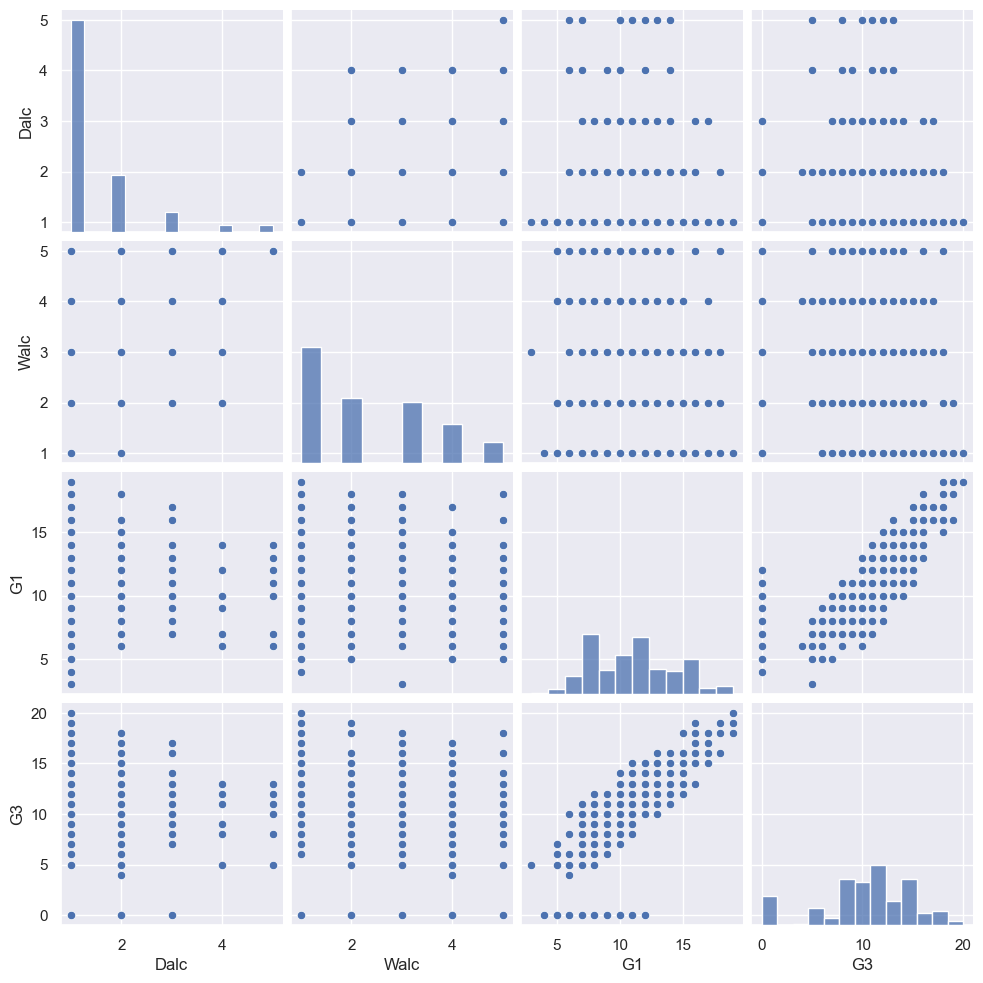

In [58]:
# アルコールの摂取と成績の関係を調べる
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [60]:
# 例：週末にアルコールを飲む人の１期目の成績の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

練習問題

In [83]:
# 3-1
student_data_por = pd.read_csv('student-por.csv', sep=';')

In [84]:
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [85]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [86]:
# 3-2
student_data_merge = pd.merge(student_data_math, student_data_por,
                             on = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Mjob', 'Fjob', 
                                   'reason', 'nursery', 'internet'],
                                   suffixes=('_math', '_por'))

student_data_merge.head()

,school,sex,age_math,address,famsize,Pstatus,Medu,Fedu_math,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,6,11,12,13
3,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,3,2,1,1,5,6,13,12,13
4,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [87]:
student_data_merge.describe()

,age_math,Medu,Fedu_math,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,...,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,16.582418,2.791209,2.487179,1.432234,2.054945,0.305861,3.974359,3.217949,3.111722,1.446886,...,3.974359,3.236264,3.141026,1.461538,2.272894,3.549451,4.054945,12.056777,12.157509,12.518315
std,1.172147,1.058125,1.077212,0.669099,0.865603,0.766167,0.885812,0.972148,1.125342,0.887176,...,0.858461,0.948705,1.141495,0.879629,1.257884,1.380842,5.348815,2.528821,2.521269,2.839536
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,10.250000,11.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [88]:
student_data_merge.columns

Index(['school', 'sex', 'age_math', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu_math', 'Mjob', 'Fjob', 'reason', 'guardian_math',
       'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math',
       'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math',
       'internet', 'romantic_math', 'famrel_math', 'freetime_math',
       'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math',
       'G1_math', 'G2_math', 'G3_math', 'age_por', 'Fedu_por', 'guardian_por',
       'traveltime_por', 'studytime_por', 'failures_por', 'schoolsup_por',
       'famsup_por', 'paid_por', 'activities_por', 'higher_por',
       'romantic_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por',
       'Walc_por', 'health_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por'],
      dtype='object')

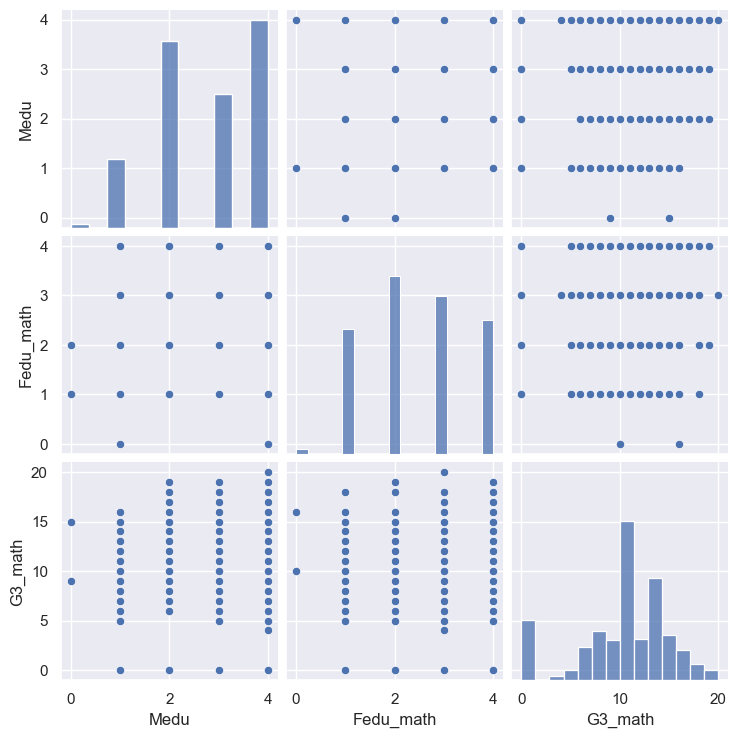

In [89]:
# 3-3
sns.pairplot(student_data_merge[['Medu', 'Fedu_math', 'G3_math']])
plt.grid(True)

## 3-4 単回帰分析

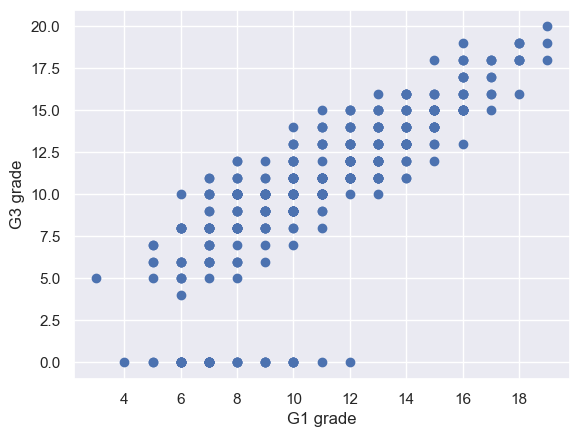

In [90]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [91]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

In [93]:
X = student_data_math.loc[:, ['G1']].values

Y = student_data_math['G3'].values

reg.fit(X, Y)

print("回帰係数:{}".format(reg.coef_))

print("切片:{}".format(reg.intercept_))

回帰係数:[1.106]
切片:-1.652803828800458


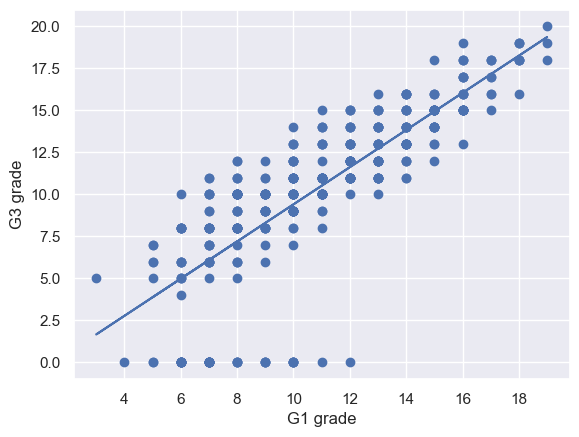

In [97]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [99]:
# Coefficient of determination(決定係数)

print("決定係数:{}".format(reg.score(X, Y)))

決定係数:0.64235084605227


練習問題

In [101]:
# 3-4
X = student_data_por.loc[:, ['G1']].values
Y = student_data_por['G3'].values

reg.fit(X, Y)

print("回帰係数:{}".format(reg.coef_))
print("切片:{}".format(reg.intercept_))
print("決定係数:{}".format(reg.score(X, Y)))

回帰係数:[0.973]
切片:0.8203984121064529
決定係数:0.6829156800171083


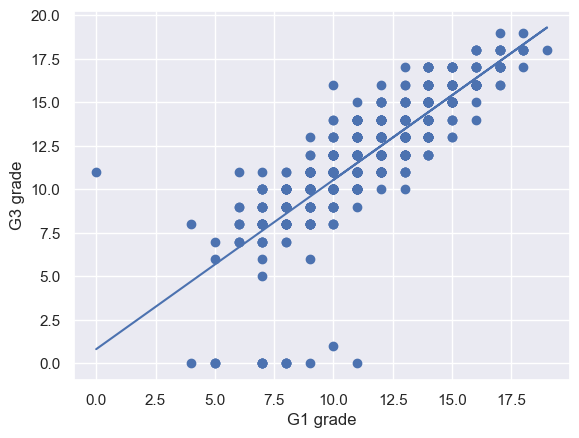

In [105]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

回帰係数:[-0.064]
切片:12.138800862687443
決定係数:0.008350131955637385


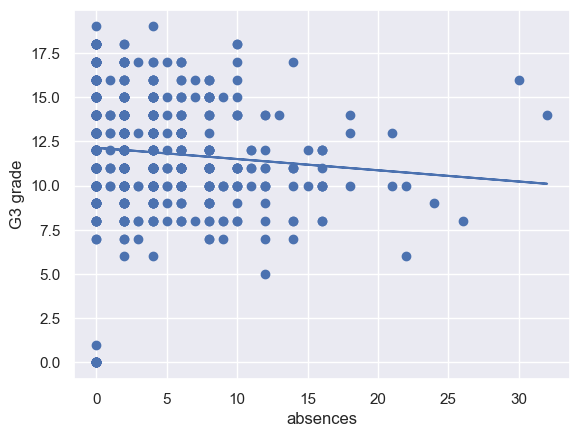

In [107]:
X = student_data_por.loc[:, ['absences']].values
Y = student_data_por['G3'].values

reg.fit(X, Y)

print("回帰係数:{}".format(reg.coef_))
print("切片:{}".format(reg.intercept_))
print("決定係数:{}".format(reg.score(X, Y)))

plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)